Import libraries and data

In [420]:
import pandas as pd
import pysal
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection  import train_test_split 
import statsmodels.api as sm
from sklearn.preprocessing import Imputer

In [475]:
crime_data = pd.read_csv('crime_data/man_cr_med.csv').set_index('lsoa')
all_data = pd.read_csv('data/manchester_data.csv').set_index('GEO_CODE').join(crime_data, how='left')

lsoa_data = gpd.read_file('shapefiles/man_lsoa_all.shp').set_index('geo_code')

In [476]:
len(lsoa_data)

1731

Preprocess data

In [391]:
all_data.head()

,local_auth,age_mean,age_median,badhealth,centheat,nodepr,depr_4+,depr_3+,depr_2+,studenthhold,onefam_hhold,nocars,eth_hhi,ethwhite,vi_crime_count
geo_code_lsoa,,,,,,,,,,,,,,,
E01005268,Manchester,40.40783,36.0,0.054014,0.976861,0.509054,0.002012,0.026157,0.191147,0.001006,0.540241,0.280684,0.285152,0.884539,37.0
E01033656,Manchester,22.29914,21.0,0.004585,0.909330,0.371879,0.001314,0.003942,0.074901,0.268068,0.152431,0.674113,0.361815,0.593410,33.0
E01005184,Manchester,29.31636,22.0,0.038190,0.966624,0.441592,0.003851,0.048780,0.227214,0.219512,0.324775,0.410783,0.159142,0.672324,45.0
E01005298,Manchester,30.76403,30.0,0.052861,0.973479,0.483619,0.006240,0.060842,0.238690,0.015601,0.546022,0.260530,0.064515,0.407629,32.0
E01005300,Manchester,36.61435,34.0,0.065343,0.977551,0.404082,0.000000,0.057143,0.242857,0.004082,0.604082,0.159184,0.060058,0.357463,12.0


In [477]:
# Fill missing values for vi_crime_count
x = all_data['vi_crime_count'].values
x = x.reshape(-1, 1)
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(x)
x = imputer.transform(x)
x = np.around(x, decimals=1)

# Replace values in dataframe
all_data['vi_crime_count'] = x

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [478]:
lsoa_data.head()

,FID_1,geo_label,geo_labelw,Count_,geometry
geo_code,,,,,
E01004962,34,Bury 009C,None,1,"POLYGON ((378830 411826, 378829.855 411826.193..."
E01005025,92,Bury 011A,None,1,"POLYGON ((379875 410309, 379877 410307, 379887..."
E01005865,124,Stockport 008B,None,2,"POLYGON ((387265.633 392486.739, 387265.33 392..."
E01006232,139,Wigan 004B,None,2,"POLYGON ((357914.404 410078.646, 357912.878 41..."
E01005501,159,Rochdale 018B,None,1,"POLYGON ((385543.964 410797.754, 385540.428 41..."


In [479]:
lsoa_all.head()

,FID_1,geo_label,geo_labelw,Count_,geometry
geo_code,,,,,
E01004962,34,Bury 009C,None,1,"POLYGON ((378830 411826, 378829.855 411826.193..."
E01005025,92,Bury 011A,None,1,"POLYGON ((379875 410309, 379877 410307, 379887..."
E01005865,124,Stockport 008B,None,2,"POLYGON ((387265.633 392486.739, 387265.33 392..."
E01006232,139,Wigan 004B,None,2,"POLYGON ((357914.404 410078.646, 357912.878 41..."
E01005501,159,Rochdale 018B,None,1,"POLYGON ((385543.964 410797.754, 385540.428 41..."


In [480]:
spatial_data = lsoa_data.join(all_data, how = 'left')

1673

In [481]:
# create the GeoDatFrame
gdf = gpd.GeoDataFrame(spatial_data, geometry = spatial_data.geometry)

In [ ]:
# save the GeoDataFrame
gdf.to_file(driver = 'ESRI Shapefile', filename= "result.shp")
# or directly
gdf.to_file("result2.shp")

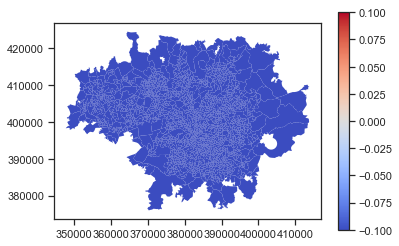

In [486]:
spatial_data.plot(column='vi_crime_count',
                  #scheme='quantiles', 
                  cmap='coolwarm', legend=True,
                  linewidth=0.00001)

In [483]:
len(spatial_data)

1731

In [411]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, E01005268 to E01005451
Data columns (total 15 columns):
local_auth        1496 non-null object
age_mean          1496 non-null float64
age_median        1496 non-null float64
badhealth         1496 non-null float64
centheat          1496 non-null float64
nodepr            1496 non-null float64
depr_4+           1496 non-null float64
depr_3+           1496 non-null float64
depr_2+           1496 non-null float64
studenthhold      1496 non-null float64
onefam_hhold      1496 non-null float64
nocars            1496 non-null float64
eth_hhi           1496 non-null float64
ethwhite          1496 non-null float64
vi_crime_count    1495 non-null float64
dtypes: float64(14), object(1)
memory usage: 227.0+ KB


In [416]:
# do median split for violent crime count
all_data['crime_med'] = np.nan  # Create a new column and set values to NaN
all_data.loc[all_data.vi_crime_count >= all_data.vi_crime_count.median(), 'crime_med'] = 'above_med'
all_data.loc[all_data.vi_crime_count < all_data.vi_crime_count.median(), 'crime_med'] = 'below_med'

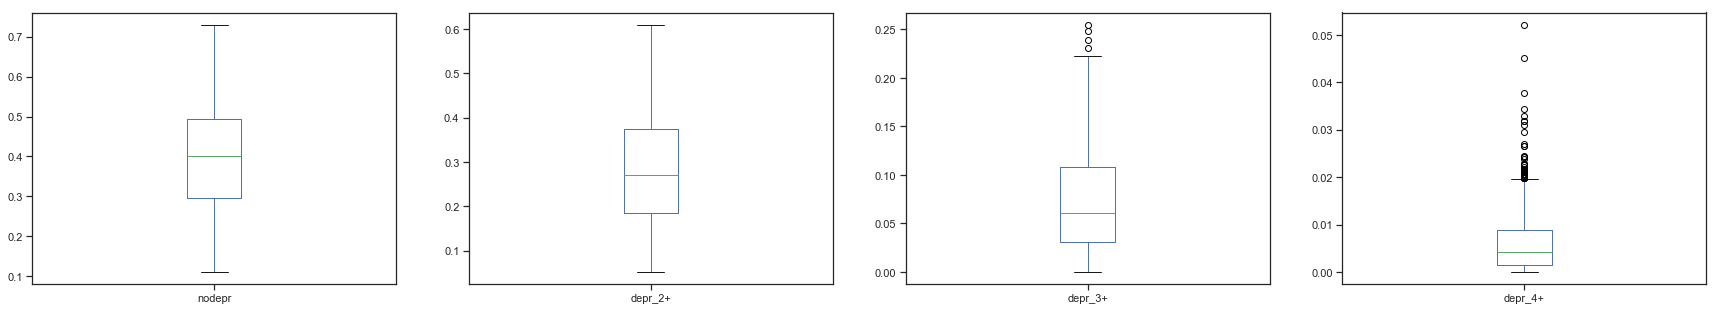

In [417]:
all_data[['nodepr', 'depr_2+', 'depr_3+', 'depr_4+']].plot(kind='box', subplots=True, figsize=(30, 5))
plt.show()

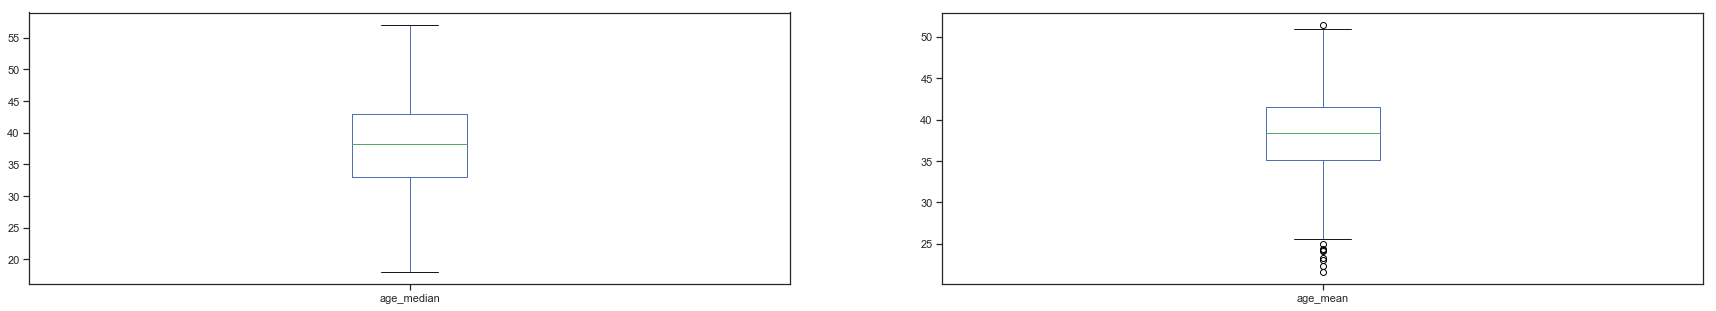

In [347]:
all_data[['age_median', 'age_mean']].plot(kind='box', subplots=True, figsize=(30, 5))
plt.show()

In [358]:
tokeep = ['crime_med', 'age_median', 'badhealth', 'studenthhold', 'onefam_hhold', 'eth_hhi', 'depr_2+', 'nocars', ]

man_data = all_data[tokeep]

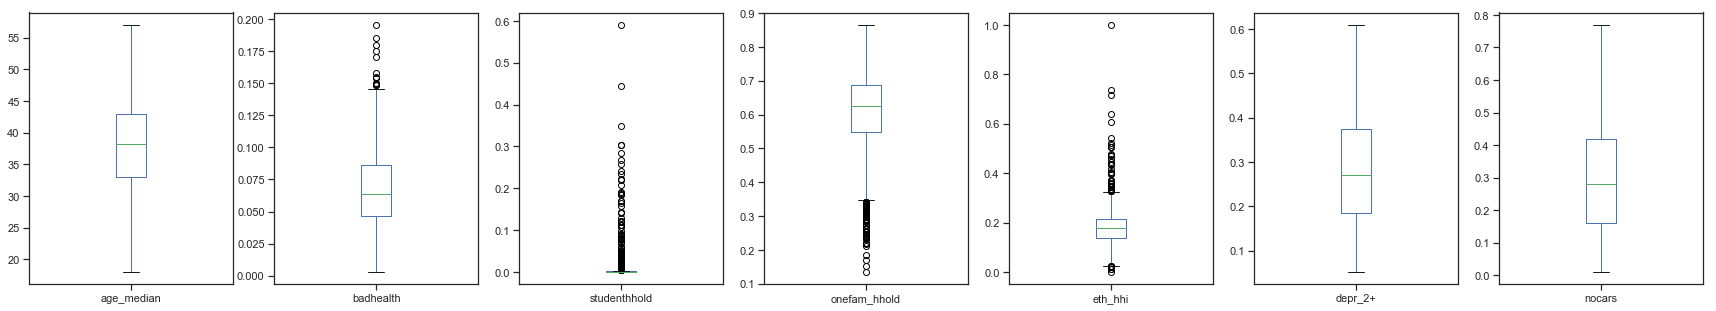

In [359]:
# box plots
man_data.plot(kind='box', subplots=True, figsize=(30, 5))
plt.show()

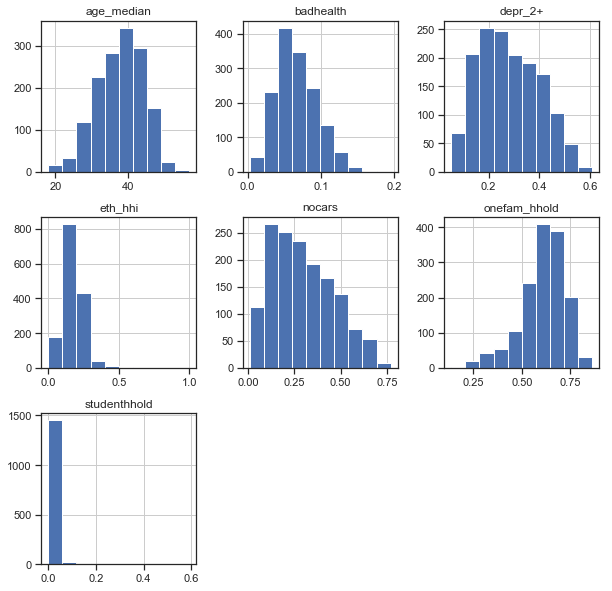

In [364]:
man_data.hist(figsize=(10, 10))
plt.show()

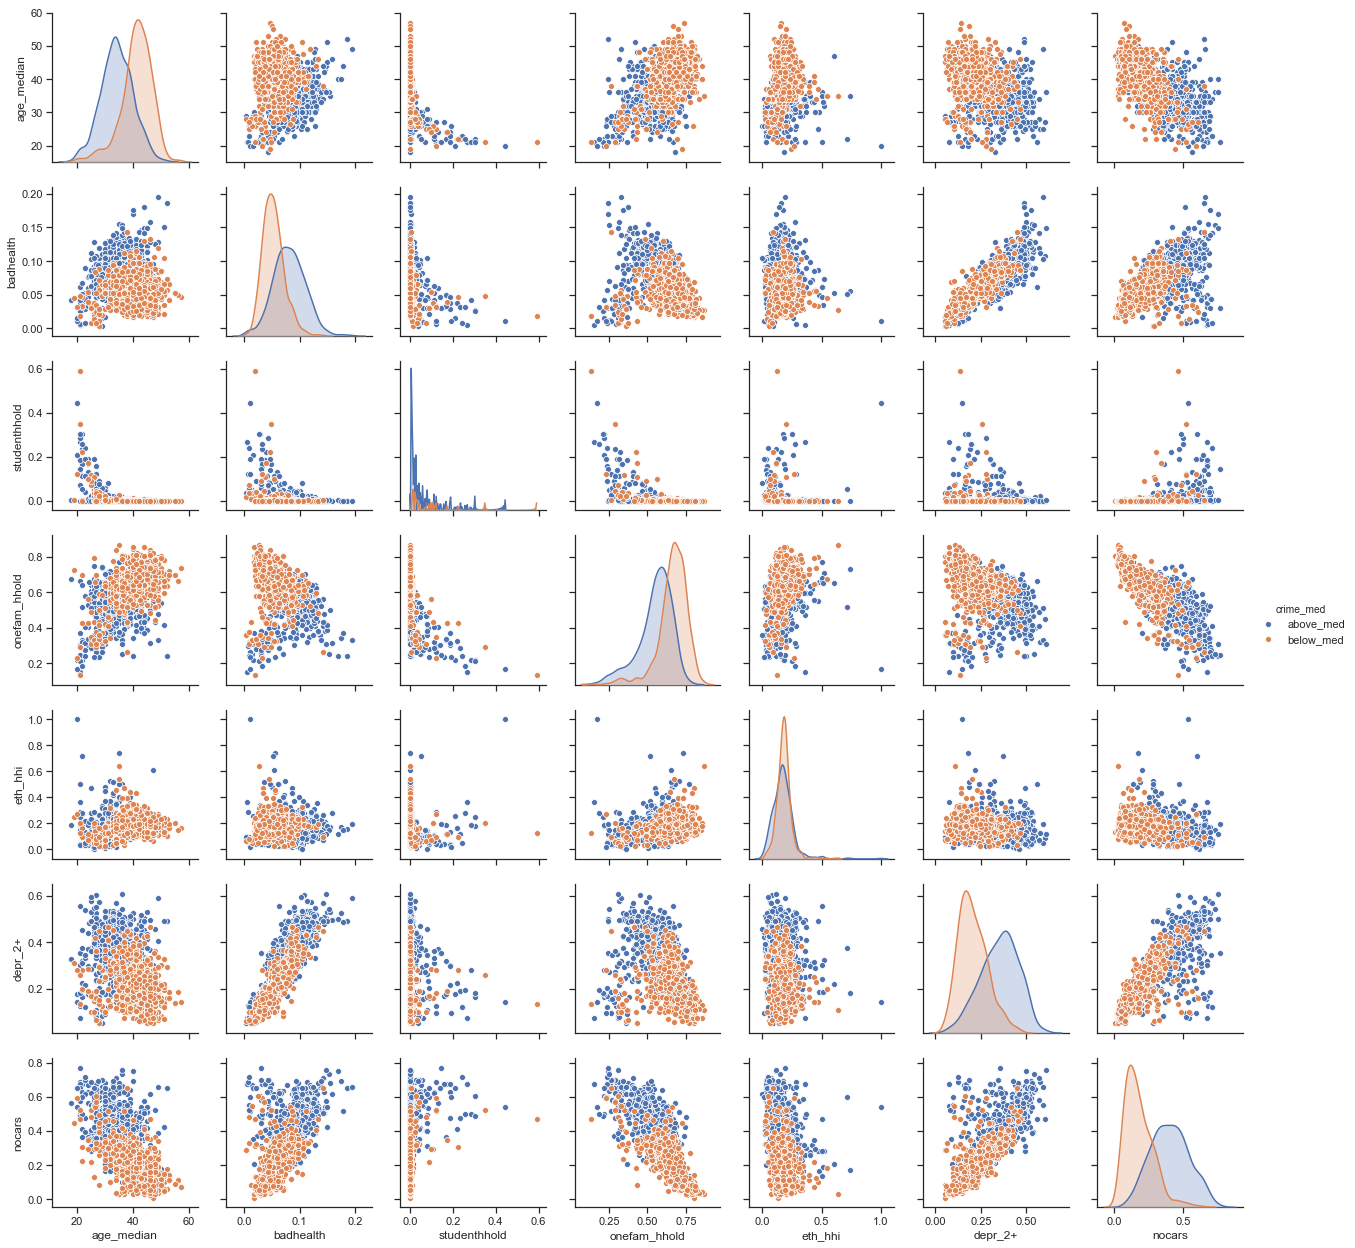

In [366]:
sns.set(style="ticks")
sns.pairplot(man_data, hue = 'crime_med')

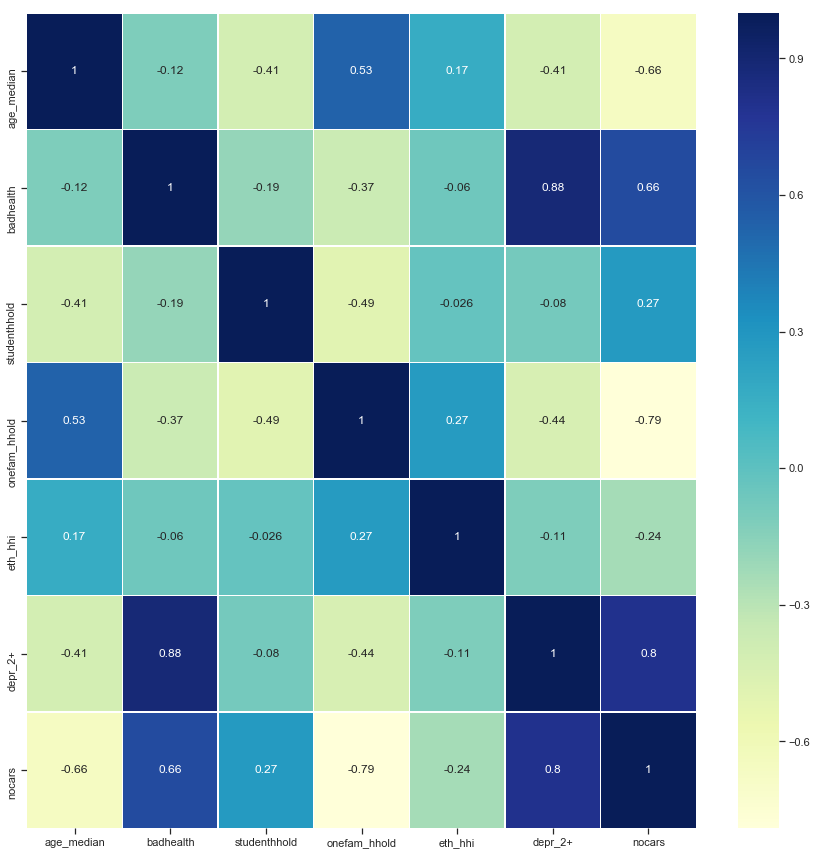

In [367]:
axsns = plt.subplots(figsize=(15, 15))
sns.heatmap(man_data.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

# K-means

In [368]:
# use the elbow method to establish number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(results)
    wcss.append(kmeans.inertia_)

In [371]:
"""
    K-Means parameters 
    n_clusters = the number of clusters
    init = the method for placing initial centroids
    max_iter = the maximum amount of iterations
    n_init = the number of times that K-means is run with different random centroids
    random_state = the seed value
"""
# use the elbow method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=1234)
    kmeans.fit(results)
    wcss.append(kmeans.inertia_)

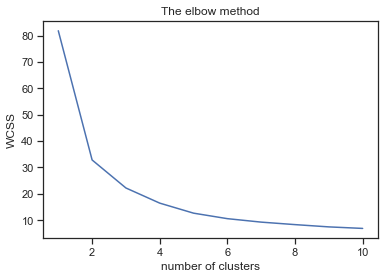

In [372]:
# Plot the WCSS results
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [373]:
# Apply K-means to petal data based on WCSS results
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter=300, n_init=10, random_state=1234)

# this will create an arry for the predicted clusters for the petal data
y_kmeans = kmeans.fit_predict(results)

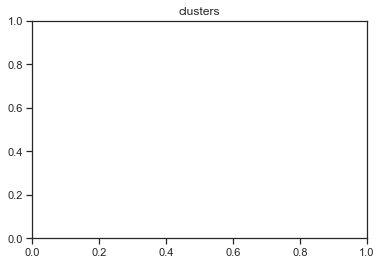

In [379]:
# Visualise the clusters
# Specify that we want the observation in X where the cluster == 0

"""
    X               = The dataset 
    [y_kmeans==0    = Where the cluster == 0 - uses the index of y-kmeans to selected rows from x
    , 0]            = The first column in the dataset
    s = 100         = The size of the points
    c = 'red'       = The color of the cluster
"""
plt.scatter(results[y_kmeans==0, 0], results[y_kmeans==0, 1], s=100, c='red')
plt.scatter(results[y_kmeans==1, 0], results[y_kmeans==1, 1], s=100, c='grey')
plt.scatter(results[y_kmeans==2, 0], results[y_kmeans==2, 1], s=100, c='yellow')
plt.scatter(results[y_kmeans==3, 0], results[y_kmeans==3, 1], s=100, c='green')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black')
plt.title('clusters')
plt.show()

# PCA

In [322]:
# Convert data to array
data = man_data.iloc[:,1:]#.values

In [323]:
# Perform PCA
pca = PCA(n_components=None) # Create an instance of the PCA class
"""
    We dont specify the amount of components to reduce to yet 
    as we want to see how many Princible Components explain the most varience in 
    the dataset
"""
pcaResults = pca.fit_transform(data) # Fit the data to the model
explained_variance = pca.explained_variance_ratio_ # Extract the varience

In [324]:
print(np.around(explained_variance,3) )

[0.999 0.001 0.    0.    0.    0.    0.   ]


In [271]:
# Convert data to array
# Perform PCA
pca = PCA(n_components=2) # Now specify 2 components
results = pca.fit_transform(data)

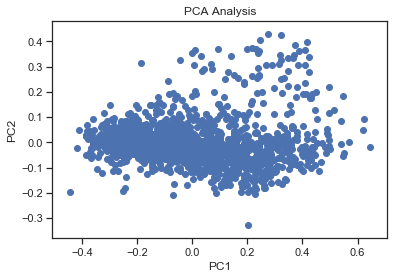

In [327]:
# Show Plot
plt.scatter(results[:,0], results[:,1])
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [328]:
colour_map = {
    'above_med': 'blue',
    'below_med' : 'orange',
    #np.nan : 'green'
}

In [329]:
# Create an array of colours based on the target column
colours = [colour_map[c] for c in man_data['cr_med_n']]

KeyError: nan

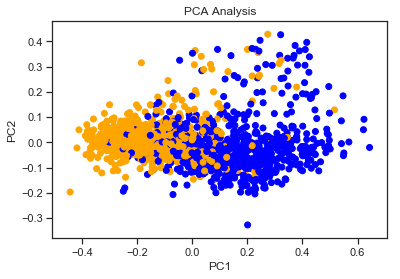

In [275]:
# Show Plot
plt.scatter(results[:,0], results[:,1], c=colours)
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Regression

In [276]:
tokeep = ['cr_med_n', 'badhealth', 'centheat', 'onefam_hhold', 'eth_hhi', 'depr_2+', 'nocars']

man_data = all_data[tokeep]

In [277]:
man_data.head()

,cr_med_n,badhealth,centheat,onefam_hhold,eth_hhi,depr_2+,nocars
geo_code_lsoa,,,,,,,
E01005268,above_med,0.054014,0.976861,0.540241,0.285152,0.191147,0.280684
E01033656,above_med,0.004585,0.909330,0.152431,0.361815,0.074901,0.674113
E01005184,above_med,0.038190,0.966624,0.324775,0.159142,0.227214,0.410783
E01005298,above_med,0.052861,0.973479,0.546022,0.064515,0.238690,0.260530
E01005300,below_med,0.065343,0.977551,0.604082,0.060058,0.242857,0.159184


In [278]:
#Reference Variable
man_data['_intercept'] = 1 # if all variables == 0

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [279]:
# Create Dummy Variables
dummy_df = pd.get_dummies(man_data.cr_med_n, prefix='cr_med')
man_data = man_data.join(dummy_df)
man_data = man_data.drop(['cr_med_n', 'cr_med_below_med'], axis=1)

# View Results
man_data.head()

,badhealth,centheat,onefam_hhold,eth_hhi,depr_2+,nocars,_intercept,cr_med_above_med
geo_code_lsoa,,,,,,,,
E01005268,0.054014,0.976861,0.540241,0.285152,0.191147,0.280684,1,1
E01033656,0.004585,0.909330,0.152431,0.361815,0.074901,0.674113,1,1
E01005184,0.038190,0.966624,0.324775,0.159142,0.227214,0.410783,1,1
E01005298,0.052861,0.973479,0.546022,0.064515,0.238690,0.260530,1,1
E01005300,0.065343,0.977551,0.604082,0.060058,0.242857,0.159184,1,0


In [280]:
# import the dataset
x = man_data.iloc[:, :-1] # predictors
y = man_data.iloc[:,-1] # result 

# split the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=5)

In [281]:
# Make the model
logit = sm.Logit(y_train, x_train)

# Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [282]:
# View the results
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:       cr_med_above_med   No. Observations:                 1196
Model:                          Logit   Df Residuals:                     1189
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                     inf
Time:                        15:33:05   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
badhealth       -0.9676      7.630     -0.127      0.899     -15.923      13.987
centheat       -15.5287      6.503     -2.388      0.017     -28.274      -2.784
onefam_hhold     0.3633      1.668      0.21

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [283]:
# Get the predicted values from the test set
y_pred = result.predict(x_test)

In [284]:
# print confusion matrix
from sklearn.metrics import *
print(confusion_matrix(y_test, np.round(y_pred,0)))

[[120  30]
 [ 22 128]]


In [285]:
# Accuracy %
from sklearn.metrics import *
accuracy_score(y_test, np.round(y_pred,0))

0.8266666666666667